*This notebook provides a typical example of possible numerical experiments made possible by the package WaterWaves1D. Specifically, we integrate numerically two models for the propagation of water waves with the same initial data, and compare solutions.*

## Initialization

Import package

In [1]:
Pkg.activate("..")
using WaterWaves1D
#include("../src/dependencies.jl");
include("../src/models/WaterWaves.jl"); #include the model which will be used
include("../src/models/WWn.jl");

 Activating environment at `~/Desktop/Julia/WaterWavesModels/WaterWaves1D.jl/Project.toml`


Define parameters of the problem

In [2]:
param = ( 
    # Physical parameters. Variables are non-dimensionalized as in Lannes, The water waves problem, isbn:978-0-8218-9470-5
    μ  = 1,     # shallow-water dimensionless parameter
    ϵ  = 1/4,   # nonlinearity dimensionless parameter
    # Numerical parameters
    N  = 2^11,  # number of collocation points
    L  = 10,    # half-length of the numerical tank (-L,L)
    T  = 5,     # final time of computation
    dt = 0.01, # timestep
                );

Define initial data


In [3]:
z(x) = exp.(-abs.(x).^4); # surface deformation
v(x) = 0*exp.(-x.^2);     # zero initial velocity 
init = Init(z,v);         # generate the initial data with correct type

Set up initial-value problems for different models to compare

In [4]:
model1=WaterWaves(param,verbose=false) # The water waves system
model2=WWn(param;n=2,dealias=1,δ=1/10,verbose=false) # The quadratic model (WW2)
# type `?WaterWaves` or `?WWn` to see details and signification of arguments
problem1=Problem(model1, init, param, solver=RK4(model1)) ;
problem2=Problem(model2, init, param, solver=RK4(model2)) ;
problems = [problem1 problem2] ;

┌ Info: 
│ Build the initial-value problem for model water waves
│ with parameters
│ (μ = 1, ϵ = 0.25, N = 2048, L = 10, T = 5, dt = 0.01)
└ @ WaterWaves1D /Users/vduchene/Desktop/Julia/WaterWavesModels/WaterWaves1D.jl/src/problem.jl:47
┌ Info: 
│ Build the initial-value problem for model WW2
│ with parameters
│ (μ = 1, ϵ = 0.25, N = 2048, L = 10, T = 5, dt = 0.01)
└ @ WaterWaves1D /Users/vduchene/Desktop/Julia/WaterWavesModels/WaterWaves1D.jl/src/problem.jl:47


## Computation

Solve integration in time

In [5]:
solve!(problems)

Progress:  39%|████████████████                         |  ETA: 0:00:06┌ Info: 
│ Done solving the model water waves
│ with parameters
│ (μ = 1, ϵ = 0.25, N = 2048, L = 10, T = 5, dt = 0.01)
└ @ WaterWaves1D /Users/vduchene/Desktop/Julia/WaterWavesModels/WaterWaves1D.jl/src/problem.jl:176
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06


┌ Info: 
│ Done solving the model WW2
│ with parameters
│ (μ = 1, ϵ = 0.25, N = 2048, L = 10, T = 5, dt = 0.01)
└ @ WaterWaves1D /Users/vduchene/Desktop/Julia/WaterWavesModels/WaterWaves1D.jl/src/problem.jl:176


## Visualization

Plot solutions at final time


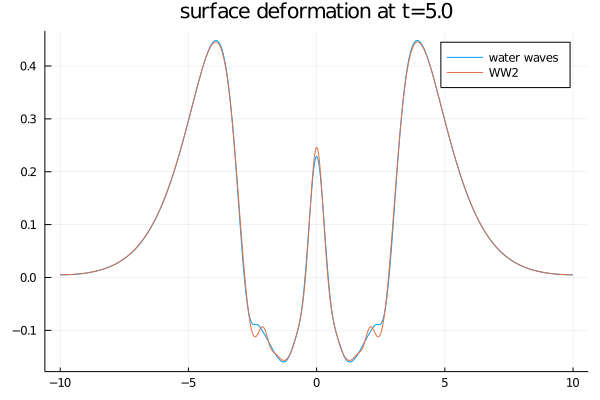

In [6]:
include("../src/Figures.jl");
plot_solution(problems;fourier=false)

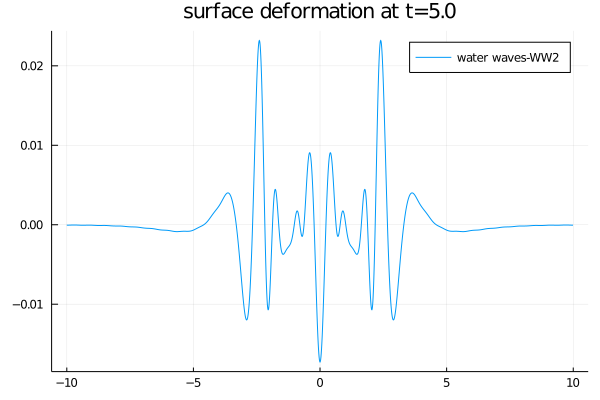

In [7]:
plot_difference(problems;fourier=false)

Generate animation

Creating animation: 100%|███████████████████████████████| Time: 0:00:11
┌ Info: Saved animation to 
│   fn = /Users/vduchene/Desktop/Julia/WaterWavesModels/WaterWaves1D.jl/notebooks/WWvsXX.gif
└ @ Plots /Users/vduchene/.julia/packages/Plots/uCh2y/src/animation.jl:104


Plots.AnimatedGif("/Users/vduchene/Desktop/Julia/WaterWavesModels/WaterWaves1D.jl/notebooks/WWvsXX.gif")
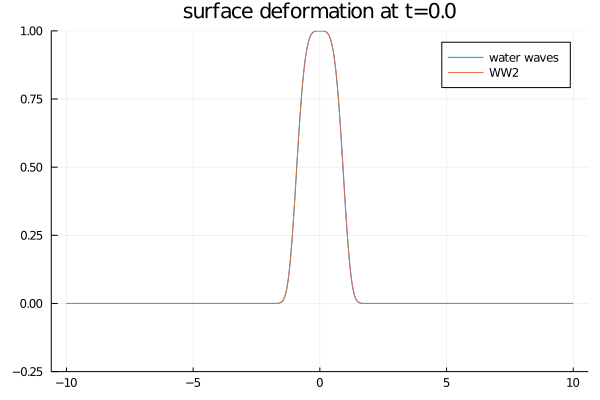

In [8]:
anim = create_animation(problems;fourier=false,ylims=(-0.25,1))
gif(anim, "WWvsXX.gif", fps=15)